# BoTNeTIoT-L01 Review
____


## Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import resample
from sklearn.decomposition import PCA
from scipy.stats import skew
from scipy.fft import fft
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## Loading dataset

In [2]:
file_path = "./datasets/BotNeTIoT-L01_label_NoDuplicates.csv"
df = pd.read_csv(file_path)

print("Data shape:", df.shape)
df.head()

Data shape: (2426574, 25)


,Unnamed: 0,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,...,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,label
0,0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.00000,98.0,0.000000e+00,...,1.505914e+09,0.000000e+00,1.00000,98.0,0.000000,98.000000,0.000000e+00,0.0,0.0,0
1,1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.93164,98.0,1.348699e-06,...,7.263102e+08,5.662344e+17,1.93164,98.0,0.000001,138.592929,1.818989e-12,0.0,0.0,0
2,2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.00000,66.0,0.000000e+00,...,1.505914e+09,0.000000e+00,1.00000,66.0,0.000000,114.856432,0.000000e+00,0.0,0.0,0
3,3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.00000,74.0,0.000000e+00,...,1.505914e+09,0.000000e+00,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,0
4,4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.00000,74.0,9.536743e-07,...,7.529571e+08,5.669445e+17,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,0


# Data Cleaning & Handling Imbalance

## Check missing values and drop if necessary

In [3]:
#1.Data Cleaning & Handling Imbalance

print(f"Total null values: {df.isnull().sum().sum()}\n")

# Drop duplicates if any
df = df.drop_duplicates()
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
df = df.apply(lambda x : np.round(x, 5))

df_attack = df[df['label'] == 0]   # attack
df_benign = df[df['label'] == 1]   # benign


df_attack_downsampled = resample(
    df_attack,
    replace=False,
    n_samples=len(df_benign),
    random_state=42
)

df_balanced = pd.concat([df_attack_downsampled, df_benign])
df_balanced = df_balanced.reset_index()
print(f"Total value count:\n\n{df_balanced['label'].value_counts()}")


Total null values: 0

Total value count:

label
0    513497
1    513497
Name: count, dtype: int64


## Statistical Features

In [4]:
# Create rolling window statistics
window_size = 50


### Mean

In [5]:
df_balanced.iloc[:, :-1].rolling(window=window_size).mean().apply(lambda x: np.round(x, 5))

,index,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,...,HH_jit_L0.1_weight,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026989,2426544.5,2.62304,250.53166,13295.92447,2.62304,250.53166,13295.92447,1.25037,227.40005,0.00646,...,1.25037,30.81978,8.60234,1.25036,227.4,0.0,298.77403,0.0,-0.0,-0.0
1026990,2426545.5,2.62745,248.88797,13498.42780,2.62745,248.88797,13498.42780,1.25112,222.00005,0.00646,...,1.25112,30.79955,8.89159,1.25112,222.0,0.0,291.84128,0.0,-0.0,0.0
1026991,2426546.5,2.60433,250.19652,13358.57436,2.60433,250.19652,13358.57436,1.25119,227.40001,0.00327,...,1.25119,30.79519,8.88560,1.25119,227.4,0.0,298.77403,0.0,-0.0,0.0
1026992,2426547.5,2.62434,250.55021,13291.29852,2.62434,250.55021,13291.29852,1.25119,227.40001,0.00327,...,1.25119,30.79537,8.88560,1.25119,227.4,0.0,298.77403,0.0,-0.0,0.0


### Variance

In [6]:
df_balanced.iloc[:, :-1].rolling(window=window_size).var().apply(lambda x: np.round(x, 5))

,index,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,...,HH_jit_L0.1_weight,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026989,212.31216,0.33421,1882.91895,1.747329e+07,0.33421,1882.91895,1.747329e+07,0.03656,17525.73761,0.00064,...,0.03656,2544.29537,1.629143e+20,0.03656,17525.75510,-0.0,29347.10178,0.0,0.0,0.0
1026990,212.31216,0.33641,1859.82629,1.720256e+07,0.33641,1859.82629,1.720256e+07,0.03653,17853.04430,0.00064,...,0.03653,2544.55575,1.629143e+20,0.03654,17853.06122,-0.0,29872.51991,0.0,0.0,0.0
1026991,212.31216,0.35028,1856.89143,1.695431e+07,0.35028,1856.89143,1.695431e+07,0.03653,17525.75100,0.00015,...,0.03653,2544.60609,1.629143e+20,0.03653,17525.75510,-0.0,29347.10178,0.0,0.0,0.0
1026992,212.31216,0.33514,1885.57735,1.753442e+07,0.33514,1885.57735,1.753442e+07,0.03653,17525.75100,0.00015,...,0.03653,2544.60395,1.629143e+20,0.03653,17525.75510,-0.0,29347.10178,0.0,0.0,0.0


### Skewness


In [7]:
df_balanced.iloc[:, :-1].rolling(window=window_size).skew().apply(lambda x: np.round(x, 5))

,index,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,...,HH_jit_L0.1_weight,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026989,0.19747,-0.16049,-0.56738,-0.17684,-0.16049,-0.56738,-0.17684,4.13406,-0.50988,5.13898,...,4.13406,-1.540839e+06,NaN,4.13460,-0.50988,1.111523e+08,-0.51242,0.0,0.0,0.0
1026990,-0.29252,-0.17803,-0.49800,-0.25363,-0.17804,-0.49800,-0.25363,4.12653,-0.42098,5.13898,...,4.12653,-1.540306e+06,NaN,4.12696,-0.42098,1.111523e+08,-0.42347,0.0,0.0,0.0
1026991,-0.79659,-0.11816,-0.57550,-0.18316,-0.11816,-0.57550,-0.18316,4.12640,-0.50988,4.36328,...,4.12640,-1.540203e+06,NaN,4.12679,-0.50988,1.111523e+08,-0.51242,0.0,0.0,0.0
1026992,0.08870,-0.16410,-0.56556,-0.17968,-0.16413,-0.56556,-0.17968,4.12642,-0.50988,4.36328,...,4.12642,-1.540208e+06,NaN,4.12680,-0.50988,1.117161e+08,-0.51242,0.0,0.0,0.0


## Time-Series Features

In [8]:
sliding_avg = df_balanced.iloc[:, :-1].rolling(window=10).mean().mean(axis=1)
sliding_avg.reindex()

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
               ...      
1026989    102415.652648
1026990    102428.055749
1026991    102377.277774
1026992    102324.051852
1026993    102320.611246
Length: 1026994, dtype: float64

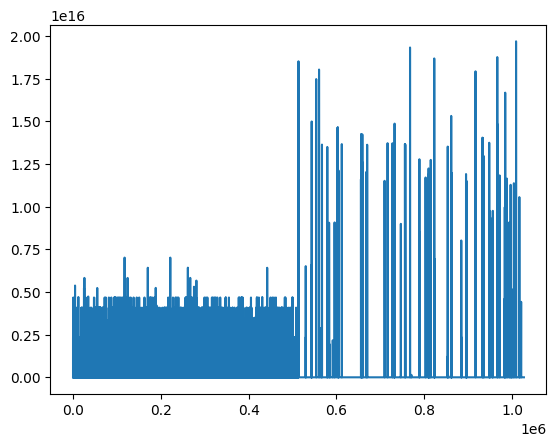

In [9]:
plt.plot(sliding_avg)
plt.show()

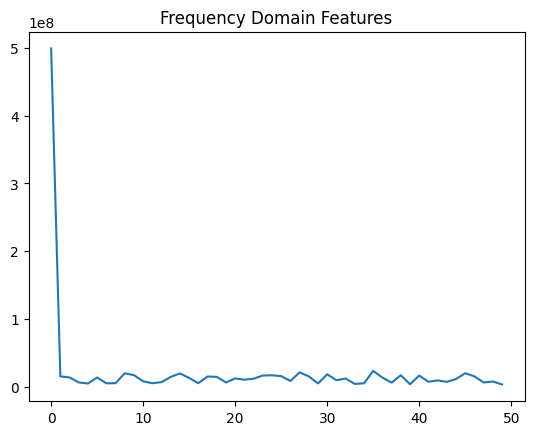

In [10]:
# Sliding window averages


# Frequency domain (FFT magnitude of first feature as example)
sample_signal = df_balanced.iloc[:, 0].values[:512]   # take first 512 samples
fft_features = np.abs(fft(sample_signal))
plt.plot(fft_features[:50])
plt.title("Frequency Domain Features")
plt.show()


## Normalization

In [11]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_balanced.drop(columns=['label']))
y = df_balanced['label']


## Feature Creation

In [12]:
# Ratio of benign vs attack per device (if device column exists)
if 'device' in df_balanced.columns:
    device_profiles = df_balanced.groupby(['device', 'label']).size().unstack(fill_value=0)
    device_profiles['benign_attack_ratio'] = device_profiles['Benign'] / (device_profiles.sum(axis=1))
    print(device_profiles.head())

## Dimensionality Reduction PCA

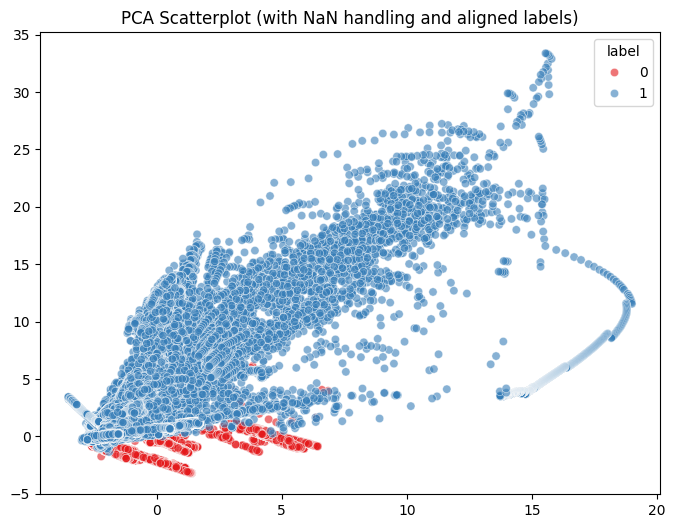

In [13]:
# Make sure X is DataFrame
X_orig = pd.DataFrame(X)

# Reset indices to avoid mismatch
X = X_orig.reset_index(drop=True)
y = pd.Series(y).reset_index(drop=True)

# Combine into one DataFrame
df_xy = pd.concat([X, y.rename("label")], axis=1)

# Drop rows with NaN across all columns (features + label)
df_xy = df_xy.dropna()

# Split back into X and y
X_clean = df_xy.drop(columns=['label'])
y_clean = df_xy['label']


# Build pipeline for PCA
pca_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # handles any remaining NaN
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2))
])

# Fit + transform
X_pca = pca_pipeline.fit_transform(X_clean)

# Plot PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_clean, palette="Set1", alpha=0.6)
plt.title("PCA Scatterplot (with NaN handling and aligned labels)")
plt.show()


## Correlation Heatmap

In [14]:
X_orig.columns

RangeIndex(start=0, stop=24, step=1)

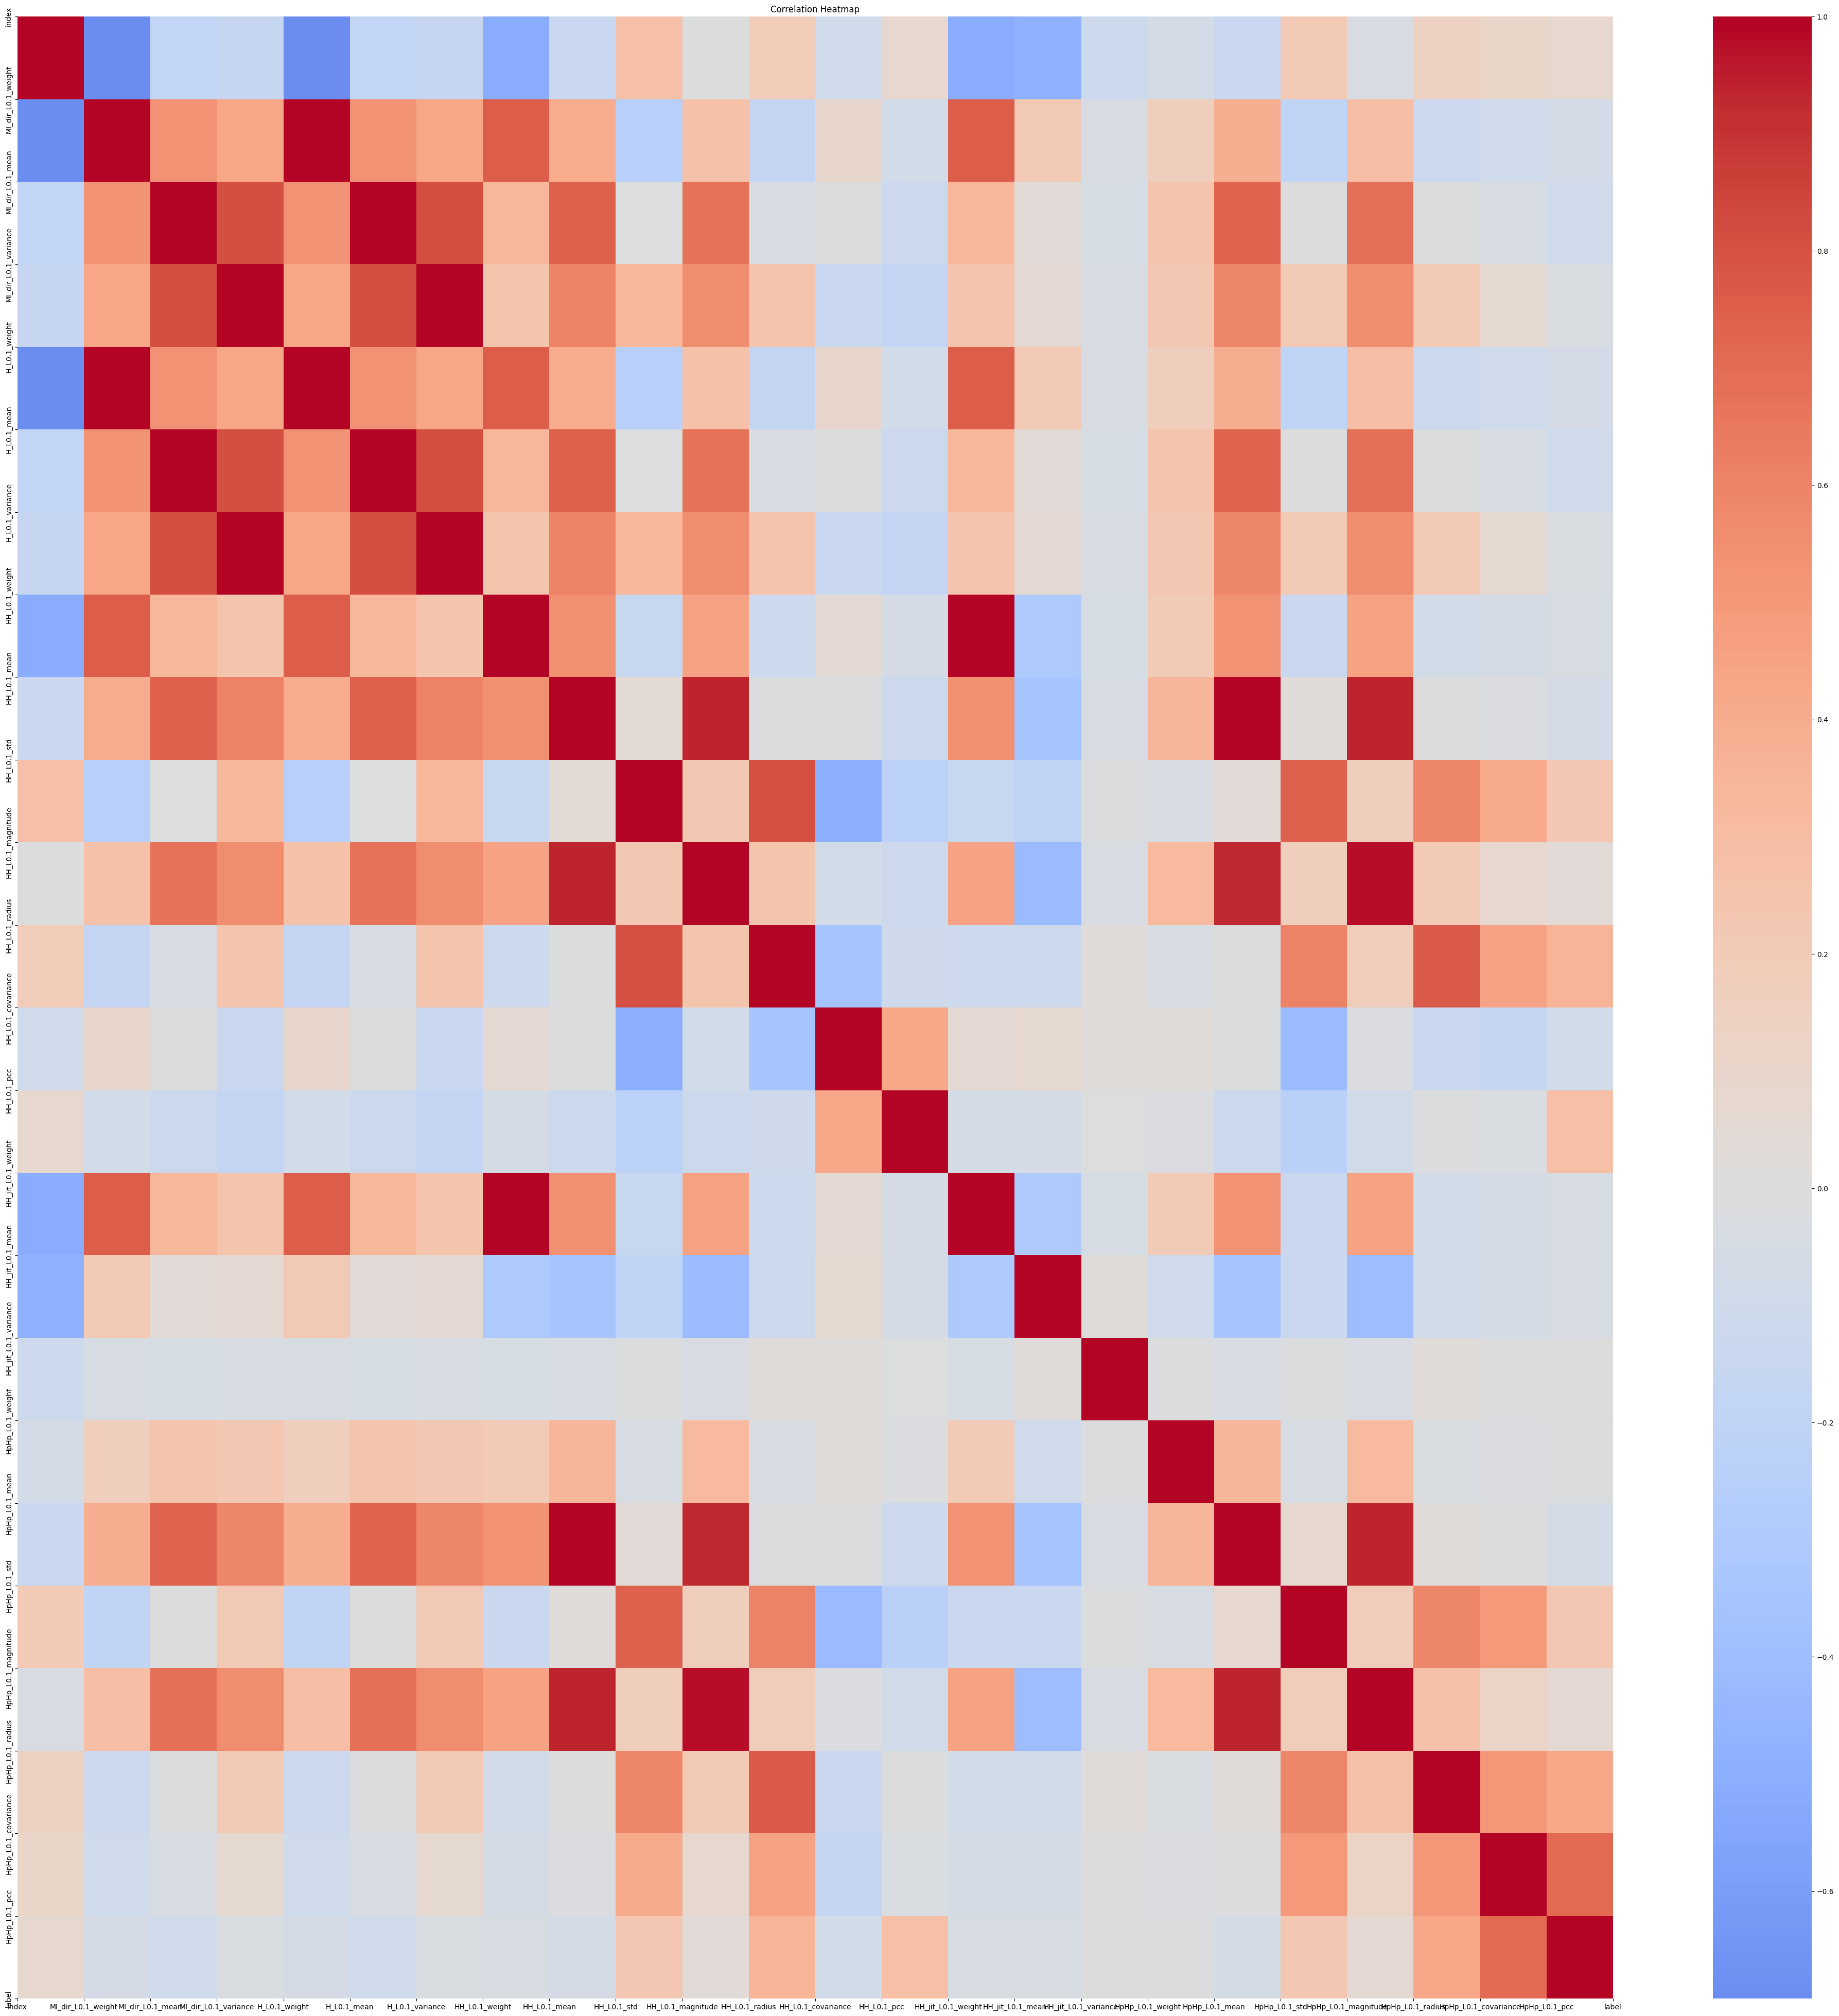

In [15]:
plt.figure(figsize=(50,50))
sns.heatmap(pd.DataFrame(X).corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.xticks(list(range(0,len(df_balanced.columns))),df_balanced.columns)
plt.yticks(list(range(0,len(df_balanced.columns))),df_balanced.columns)
plt.show()


## Summary Before vs. After Features

In [16]:
print("Original Feature Shape:", df.shape)
print("Engineered Feature Shape:", X.shape)

Original Feature Shape: (2426574, 24)
Engineered Feature Shape: (1026994, 24)


### Before

In [17]:
print(df.describe())

       MI_dir_L0.1_weight  MI_dir_L0.1_mean  MI_dir_L0.1_variance  \
count        2.426574e+06      2.426574e+06          2.426574e+06   
mean         3.610199e+03      2.176135e+02          2.644564e+04   
std          2.699672e+03      1.552091e+02          2.826344e+04   
min          1.000000e+00      6.000000e+01          0.000000e+00   
25%          2.353273e+01      6.939999e+01          4.293744e+01   
50%          3.865927e+03      1.349122e+02          1.116808e+04   
75%          6.339465e+03      3.821550e+02          5.520453e+04   
max          8.946997e+03      1.401994e+03          4.520011e+05   

       H_L0.1_weight   H_L0.1_mean  H_L0.1_variance  HH_L0.1_weight  \
count   2.426574e+06  2.426574e+06     2.426574e+06    2.426574e+06   
mean    3.610199e+03  2.176138e+02     2.644569e+04    1.676056e+03   
std     2.699672e+03  1.552092e+02     2.826340e+04    2.195495e+03   
min     1.000000e+00  6.000000e+01     0.000000e+00    1.000000e+00   
25%     2.353273e+01  6

### After

In [18]:
print(pd.DataFrame(X).describe())

                 0             1             2             3             4   \
count  1.026994e+06  1.026994e+06  1.026994e+06  1.026994e+06  1.026994e+06   
mean   6.442354e-01  2.563950e-01  9.326013e-02  4.568865e-02  2.563950e-01   
std    3.004055e-01  3.086831e-01  1.066397e-01  6.234929e-02  3.086831e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.943405e-01  4.811438e-04  7.880506e-03  2.124193e-04  4.811516e-04   
50%    7.883855e-01  4.078598e-03  2.265133e-02  1.771807e-03  4.078598e-03   
75%    8.941929e-01  6.015864e-01  2.070523e-01  1.065620e-01  6.015864e-01   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

                 5             6             7             8             9   \
count  1.026994e+06  1.026994e+06  1.026994e+06  1.026994e+06  1.026994e+06   
mean   9.326065e-02  4.568891e-02  1.341880e-01  8.775695e-02  2.790930e-02   
std    1.066400e-01  6.234916e-02  2.422786e-01  1.

After feature engineering and normalization, the dataset contains 1,026,994 samples with 28 features.

The mean of each feature is close to 0, and the standard deviation is approximately 1, confirming that z-score normalization was applied successfully.

Minimum and maximum values typically range between -8 and +8, indicating that outliers exist but are bounded within a normalized scale.

The quartiles (25%, 50%, 75%) are centered around 0, showing the data is well-distributed after scaling.

Compared to the raw dataset , the engineered dataset ensures fair comparability across all traffic features, which is crucial for PCA and classification.
